# Transformadas de Fourier y Graficación 3D

## Transformadas rápidas de Fourier en Python

La transformada de Fourier es una herramienta importante en física e ingeniería, y los paquetes científicos de Python tienen varias rutinas para trabajar con ellas. Tanto **NumPy** como **SciPy** tienen una interface a la biblioteca FFTPACK [http://www.netlib.org/fftpack/] que ha sido probada y optimizada durante muchos años. La biblioteca FFTW ("Fastest Fourier Transform in the West.") [http://fftw.org], escrita en C, con interfaces en C y Fortran es una de las más rápidas y puede accederse en Python mediante el paquete PyFFTW [https://github.com/hgomersall/pyFFTW].

In [1]:
import numpy as np
# Notar acá el backend a utilizar: es diferente!
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('presentation')


Vamos a calcular los coeficientes de la serie de Fourier de una dada función, evaluada en un conjunto de puntos equiespaciados.

En **Numpy**, la función `np.fft.fft()` realiza la transformada discreta directa y la función `np.fft.ifft()` la transformada inversa. Veamos un poco qué son y cómo se calculan.

**La transformada discreta directa** de una función $f(x)$ evaluada en $N$ puntos $x_{n}$, con $y_{n} = f(x_{n})$, está dada por:

$$Y_{k} = \sum_{n=0}^{N-1} y_n \cdot e^{-i~2\pi~k~n~/~N}$$

y **la transformada discreta inversa** se define como:
$$y_{n} = \frac{1}{N}\sum_{k=0}^{N-1} Y_k e^{i~2\pi~k~n~/~N}$$

La transformada rápida de Fourier no se realiza aplicando directamente esta fórmula por razones de costo computacional (ya que el número de operaciones aumenta con el número de puntos como $N^{2}$). En 1965 JW Cooley y John Tukey publicaron un trabajo [Cooley, James W., and John W. Tukey, 1965, “An algorithm for the machine calculation of complex Fourier series,” Math. Comput. 19: 297-301.] donde detallan un método que crece como $N \log(N)$. Si aumentamos el número de puntos en $1000$, el tiempo aumenta en un factor del orden de $10^{6}$ en un caso y en aproximadamente en $7000$ en el otro.

### Ejemplo: funciones senoidales

<IPython.core.display.Javascript object>


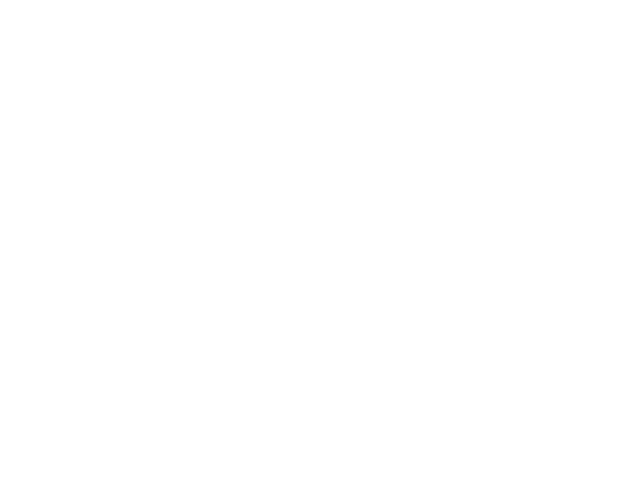

In [2]:
Fs = 150.0  # rate de muestra
Ts = 1.0 / Fs  # intervalo de muestra
t = np.arange(0, 1, Ts)  # tiempo

ff = 5   # frecuencia

# Una función cuya T.F es muy simple
y = np.sin(2 * np.pi * ff * t)
fig1= plt.figure('funcion')
plt.plot(t, y)

<IPython.core.display.Javascript object>


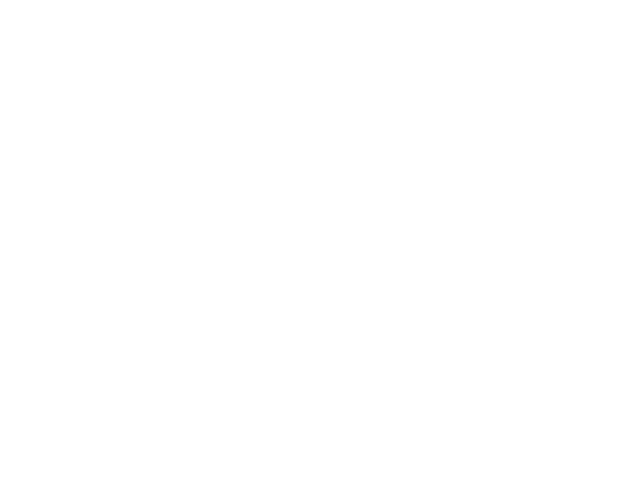

In [3]:
n = len(y)
k = np.arange(n)
n2 = range(n // 2)

Y = np.fft.fft(y)  # fft
frq = np.fft.fftfreq(n, d=Ts)   # frecuencias
fig1= plt.figure()
plt.plot(frq, np.abs(Y))

Como vemos, hay claramente dos frecuencias que contribuyen, una negativa y una positiva. Las amplitudes son iguales (valor absoluto) pero por supuesto los coeficientos son imaginarios y de signos opuestos y corresponden a frecuencias $\pm \omega$ ya que:
$$ \sin(\omega t) = \frac{e^{i \omega t} - e^{-i \omega t}}{2 i}$$


In [4]:
%matplotlib inline

In [5]:
Y.imag.min(), Y.imag.max()      # Coeficientes máximos (en valor absoluto)

(-75.0, 75.0)

In [6]:
frq[[Y.imag.argmin(), Y.imag.argmax()]]

array([ 5., -5.])

(-20, 20)

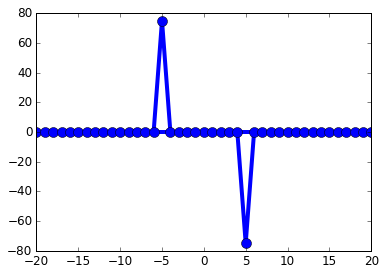

In [7]:
fig1= plt.figure()
plt.plot(frq, Y.imag, '-o')
plt.xlim((-20,20))

Debido a que para funciones reales los coeficientes correspondientes a frecuencias negativas y positivas están relacionados simplemente, es usual en estos casos graficar sólo las positivas:

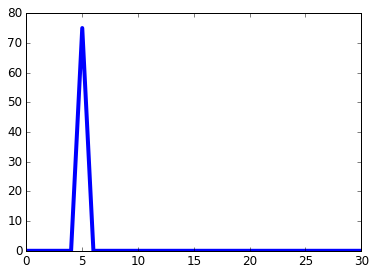

In [8]:
Y = Y[n2]
frq = frq[n2]
fig1= plt.figure()
plt.plot(frq, np.abs(Y))
plt.xlim((0,30));

Veamos un ejemplo muy similar, pero con una suma de funciones senoidales:

In [9]:
Fs = 512  # rate de muestra
Ts = 1.0 / Fs  # intervalo de muestra
t = np.arange(0, 1, Ts)  # tiempo
ff = 5   # frecuencia
y = np.sin(2 * np.pi * ff * t) + 0.5 * np.sin(2 * np.pi * 2 * ff * t)

n = len(y)
k = np.arange(n)
n2 = range(n // 2)

Y = np.fft.fft(y)               # fft directa
y2 = np.fft.ifft(Y)             # fft inversa
Y = Y[n2]                       # Sólo nos quedamos con los positivos
frq = np.fft.fftfreq(n, d=Ts)[n2] # Sólo positivos

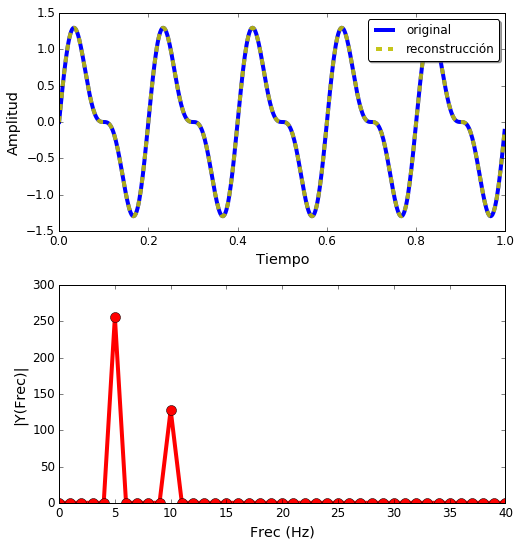

In [10]:
# Figuras
fig, ax = plt.subplots(2, 1, num='fft-2', figsize=(8,8))
# Figura superior
ax[0].plot(t, y, label="original")
ax[0].plot(t, np.real_if_close(y2), '--y', alpha=0.9, label='reconstrucción')
ax[0].set_xlabel('Tiempo')
ax[0].set_ylabel('Amplitud')
ax[0].legend(loc='best')
# Figura inferior
ax[1].plot(frq, np.abs(Y), 'o-r')  # Graficamos el espectro
ax[1].set_xlabel('Frec (Hz)')
ax[1].set_ylabel('|Y(Frec)|')
ax[1].set_xlim((0,40))

plt.subplots_adjust(bottom=0.1, hspace=0.25)


### Otro ejemplo: Transformación de una gaussiana

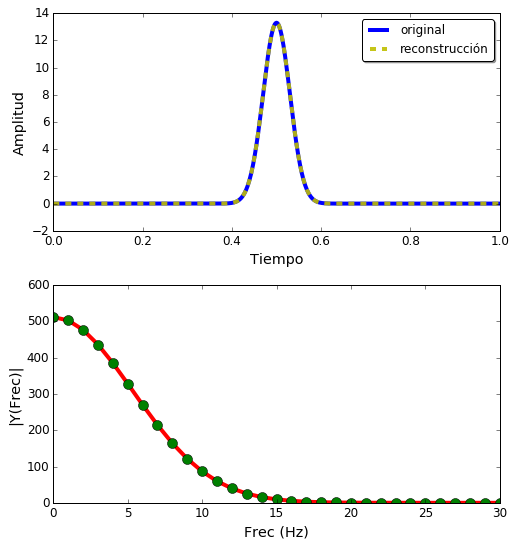

In [11]:
from scipy import stats
from scipy import fftpack

y = stats.norm.pdf(t, loc=0.5, scale=.03)

n = len(y)
k = np.arange(n)
n2 = range(n // 2)


Y = fftpack.fft(y)  # fft directa
y2 = fftpack.ifft(Y)  # fft inversa
frq = fftpack.fftfreq(n, d= Ts)
Y = Y[n2]
frq = frq[n2]

fsize = (8, 8)
fig, ax = plt.subplots(2, 1, num='fft-3', figsize=fsize)
ax[0].plot(t, y, label="original")
ax[0].plot(t, np.real_if_close(y2), '--y', alpha=0.9, label='reconstrucción')
#ax[0].plot(t, y )
#ax[0].plot(t, y2)
ax[0].set_xlabel('Tiempo')
ax[0].set_ylabel('Amplitud')
ax[0].legend(loc='best')
ax[1].plot(frq, np.abs(Y), '.-r')  # Graficamos el espectro
ax[1].plot(frq, np.abs(np.fft.fft(y)[n2]),'og')
ax[1].set_xlabel('Frec (Hz)')
ax[1].set_ylabel('|Y(Frec)|')
ax[1].set_xlim((0,30))
plt.subplots_adjust(bottom=0.1, hspace=0.25)

**Algunos puntos a notar**

- Usamos la transformada de Fourier `fft()` de `scipy.fftpack` y la comparamos con la de `numpy.fft` para mostrar que dan el mismo resultado. Si bien las funcionalidades de ambos módulos no son exactamente iguales, en este caso ambos utilizan las funciones en Fortran de FFTPACK [http://www.netlib.org/fftpack/]
- Si usamos el argumento `norm = 'ortho'` la normalización de la transformada de Fourier y de la antitransformada serán $1/\sqrt{N}$ (simétrica).
- La antitransformada de la transformada da la función original, tal como se espera
- La función `np.fftfreq()` da un *array* con las frecuencias de muestra de la FFT.
- Tanto las funciones `fft()` como `fftfreq()` devuelven valores correspondientes a los valores positivos de frecuencias en las primeras N/2 posiciones y las negativas a continuación:

```python
>>> np.fft.fftfreq(10)
array([ 0. ,  0.1,  0.2,  0.3,  0.4, -0.5, -0.4, -0.3, -0.2, -0.1])
```

### Transformaciones de funciones reales

Si las funciones son reales, entonces los coeficientes de la fft son simétricamente hermíticos; los coeficientes correspondientes a frecuencias negativas son las complejas conjugadas de los correspondientes a las frecuencias positivas, y por lo tanto no es necesario calcularlos. Para estos casos, los módulos `np.fft` y `scipy.fftpack` presentan funciones particulares `rfft()` y `rfftfreq()`.

**Notar** que el output de las dos rutinas es diferente.

Veamos cómo utilizarlo para el caso de la distribución gaussiana

In [12]:
Y2= np.fft.rfft(y)
f2= np.fft.rfftfreq(n,d=Ts)
y2= np.fft.irfft(Y2)            # Calculamos la inversa

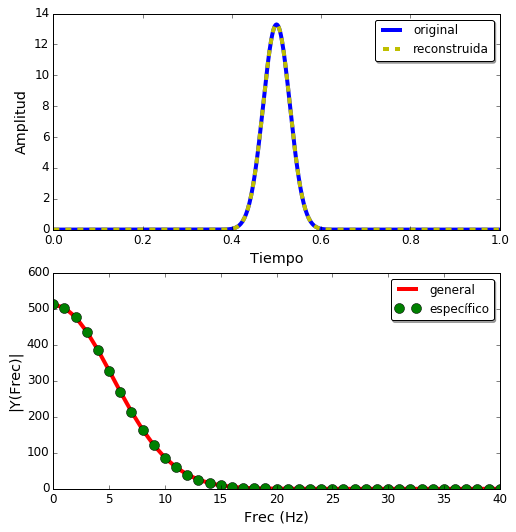

In [13]:
fsize = (8, 8)
fig, ax = plt.subplots(2, 1, num='fft-4', figsize=fsize)
ax[0].plot(t, y, label='original')
ax[0].plot(t, np.abs(y2),'--y', label='reconstruida')
ax[0].set_xlabel('Tiempo')
ax[0].set_ylabel('Amplitud')
ax[0].legend(loc='best')

ax[1].plot(frq, np.abs(Y), '-r',label='general')  # Algoritmo general
ax[1].plot(f2, np.abs(Y2), 'og', label='específico')  # Específico para input real
ax[1].set_xlabel('Frec (Hz)')
ax[1].set_ylabel('|Y(Frec)|')
ax[1].legend(loc='best')
ax[1].set_xlim((0,40));

## Gráficos y procesamiento sencillo en 2D

### Histogramas en 2D

Así como trabajamos con histogramas de arrays unidimensionales en forma sencilla usando `plt.hist()` o `np.histogram()`, podemos hacerlo de una manera similar trabajando en el plano. Empecemos creando algunos datos

In [14]:
np.random.seed(0)
n = 100000
x = np.r_[np.random.normal(size=n), np.random.normal(loc=3, size=n)]
y = 2.0 + 4.0 * x - x**2 / 5 + 2.0 * \
    np.r_[np.random.normal(size=n), np.random.normal(loc=-3, size=n)]

Para crear el histograma usamos simplemente la función `hist2d`. Que realiza la grilla acorde al argumento `bins` y luego realiza el histograma

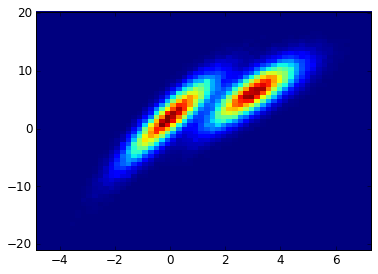

In [15]:
#fig1= plt.figure()
H= plt.hist2d(x, y, bins=60)

Aquí pusimos igual número de "cajas" en cada dimensión. También podemos pasarle un array con distinto número de cajas

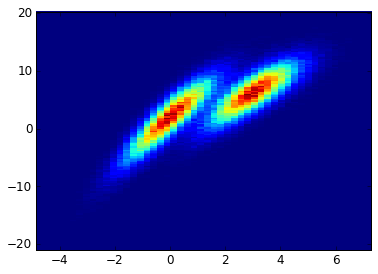

In [16]:
fig1= plt.figure()
H= plt.hist2d(x, y, bins=[50,150])

Por supuesto podemos cambiar el esquema de colores utilizado. Para ello le damos explícitamente el argumento `cmap` especificando el "colormap" deseado:

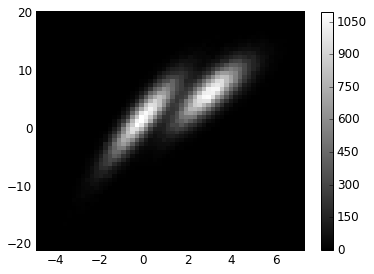

In [17]:
fig1= plt.figure()
H= plt.hist2d(x, y, bins=60, cmap='gray')
plt.colorbar();

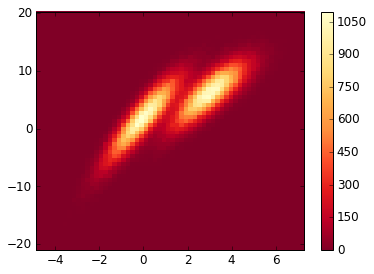

In [18]:
fig1= plt.figure()
H= plt.hist2d(x, y, bins=60, cmap=plt.cm.YlOrRd_r)
plt.colorbar();

De la misma manera, si queremos realizarlo en escala logarítmica debemos pasarle una escala de colores adecuada

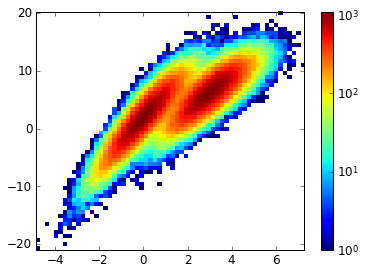

In [19]:
from matplotlib.colors import LogNorm
fig1= plt.figure()
H= plt.hist2d(x, y, bins=60, norm=LogNorm())
plt.colorbar();

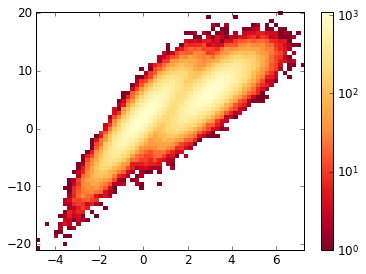

In [20]:
from matplotlib.colors import LogNorm
fig1= plt.figure()
H= plt.hist2d(x, y, bins=60, cmap=plt.cm.YlOrRd_r, norm=LogNorm())
plt.colorbar();

### Histogramas con partición hexagonal

Vemos que `plt.hist()` realiza una partición rectangular del dominio. Puede ser más agradable a la vista realizar una partición en hexágonos. Para ello está la función `plt.hexbin()` 

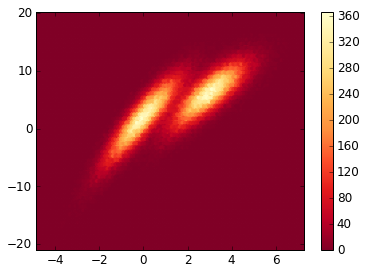

In [21]:
fig1= plt.figure()
plt.hexbin(x, y, cmap=plt.cm.YlOrRd_r)
plt.colorbar();

o, en escala logarítmica:

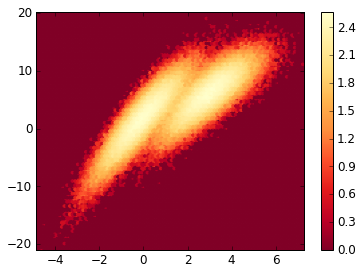

In [22]:
fig1= plt.figure()
plt.hexbin(x, y, bins='log', cmap=plt.cm.YlOrRd_r)
plt.colorbar();

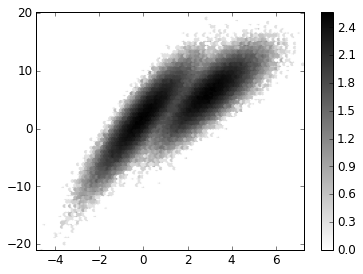

In [23]:
fig1= plt.figure()
plt.hexbin(x, y, bins='log', cmap='gray_r')
plt.colorbar();

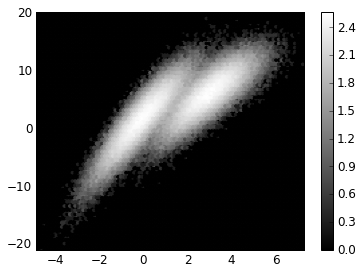

In [24]:
fig1= plt.figure()
plt.hexbin(x, y, bins='log', cmap='gray')
plt.colorbar();

### Gráficos de contornos



In [25]:
H[0].shape, H[1].shape, H[2].shape

((60, 60), (61,), (61,))

In [26]:
x0 = 0.5*(H[1][1:]+ H[1][:-1])
y0 = 0.5*(H[2][1:]+ H[2][:-1])
X,Y= np.meshgrid(x0, y0)
Z = H[0]

In [27]:
X.shape, Y.shape, Z.shape

((60, 60), (60, 60), (60, 60))

In [28]:
np.all(X[0] == X[2])

True

In [29]:
np.all(Y[0] == Y[1])

False

In [30]:
np.all(Y[:,0] == Y[:,1])

True

In [31]:
X[0,:10], X[1,:10]

(array([-4.75096788, -4.54866832, -4.34636877, -4.14406921, -3.94176966,
        -3.7394701 , -3.53717055, -3.33487099, -3.13257144, -2.93027188]),
 array([-4.75096788, -4.54866832, -4.34636877, -4.14406921, -3.94176966,
        -3.7394701 , -3.53717055, -3.33487099, -3.13257144, -2.93027188]))

Vamos a usar los datos para hacer los gráficos de contornos

(-12, 15)

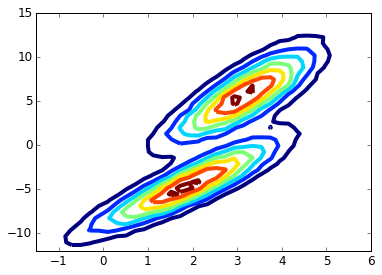

In [32]:
fig1= plt.figure()
CS = plt.contour(X, Y, Z)
plt.xlim((-1.5,6))
plt.ylim((-12,15))

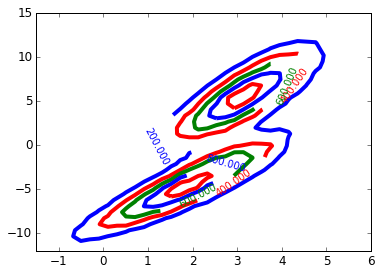

In [33]:
CS = plt.contour(X, Y, Z, 5, colors=('b','r','g'))
plt.clabel(CS, fontsize=10, inline=1)
plt.xlim((-1.5,6))
plt.ylim((-12,15));

También podemos mostrar la imagen con los contornos superpuestos:

/usr/lib64/python3.4/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


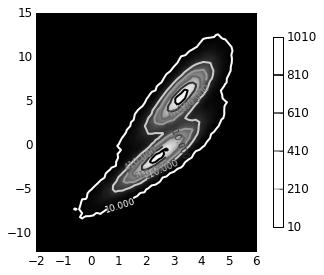

In [34]:
fig1= plt.figure()
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                extent=(-2,6,-12,15), aspect=0.32, cmap=plt.cm.gray)
levels = np.arange(10, 1210, 200)
CS = plt.contour(Z, levels, origin='lower', linewidths=2,
                 extent=(-2,6,-12,15), aspect=0.32, cmap=plt.cm.gray_r )
plt.clabel(CS, fontsize=9, inline=1)
CB = plt.colorbar(CS, shrink=0.8)

### Superficies y contornos

#### Superficies

Para realizar gráficos "realmente" en 3D debemos importar `Axes3D`

In [35]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('classic')

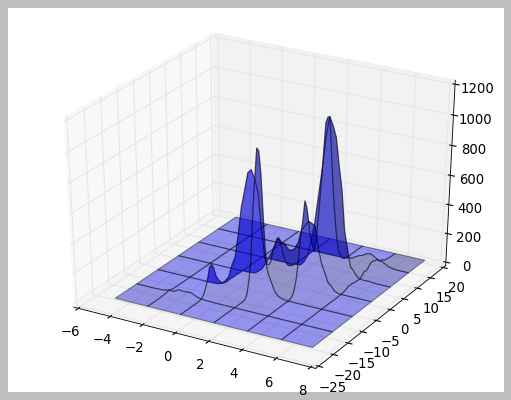

In [36]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.4)

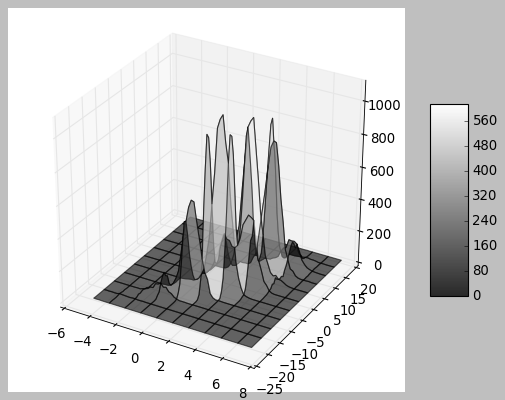

In [37]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.gray, rstride=6,cstride=6, lw=1, alpha=0.6)
ax.set_zlim(0, 1100.)
fig.colorbar(surf, shrink=0.5, aspect=5);

In [38]:
ax.plot_surface?

#### Contornos en 3D


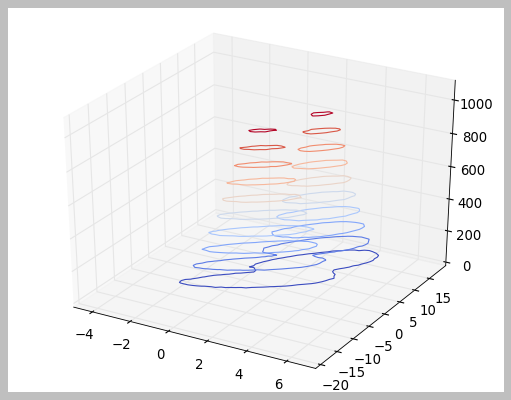

In [39]:
fig = plt.figure()
ax = fig.gca(projection='3d')
cset = ax.contour(X, Y, Z,10, cmap=plt.cm.coolwarm)
ax.clabel(cset, fontsize=9, inline=1)


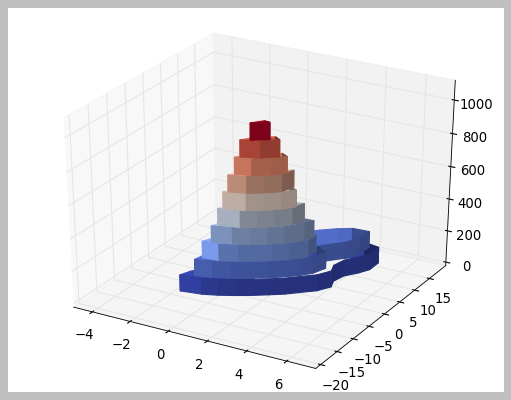

In [40]:
fig = plt.figure()
ax = fig.gca(projection='3d')
cset = ax.contour(X, Y, Z, 12, extend3d=True, cmap=plt.cm.coolwarm)
ax.clabel(cset, fontsize=9, inline=1)


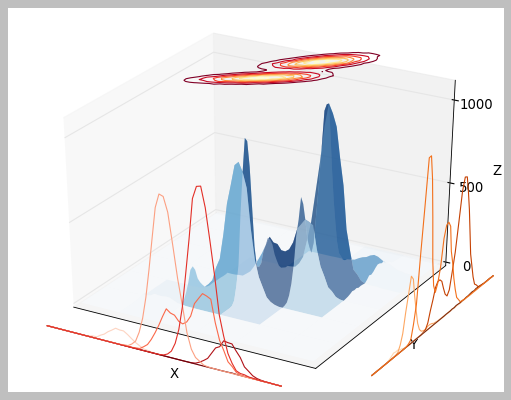

In [41]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, lw=0, alpha=0.6, cmap=plt.cm.Blues)
cset = ax.contour(X, Y, Z, zdir='z', offset=1300, cmap=plt.cm.YlOrRd_r)
cset = ax.contour(X, Y, Z, zdir='x', offset=10, cmap=plt.cm.Oranges)
cset = ax.contour(X, Y, Z, zdir='y', offset=-30, lw=6, cmap=plt.cm.Reds)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([0, 500, 1000]);



Veamos otro ejemplo. Modifiquemos el gráfico anterior para llenar los contornos laterales, utilizando la función `contourf()` en lugar de `contour()`

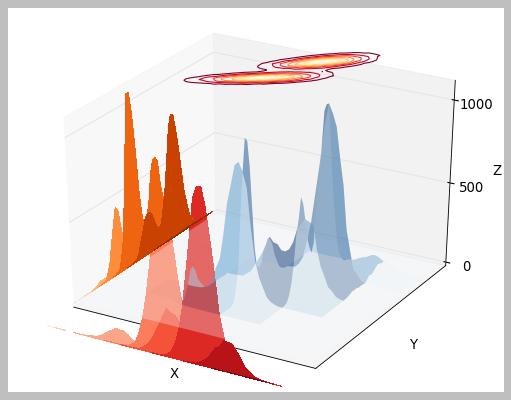

In [42]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, lw=0, alpha=0.3, cmap=plt.cm.Blues)
cset = ax.contour(X, Y, Z, zdir='z', offset=1300, cmap=plt.cm.YlOrRd_r)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-5, cmap=plt.cm.Oranges)
cset = ax.contourf(X, Y, Z, zdir='y', offset=-30, lw=6, cmap=plt.cm.Reds)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([0, 500, 1000]);



#### Gráficos de campos vectoriales

Para realizar gráficos de campos (de velocidades, fuerzas, etc) podemos utilizar la función `quiver()`, que grafica flechas en cada punto, con una dirección y longitud dada


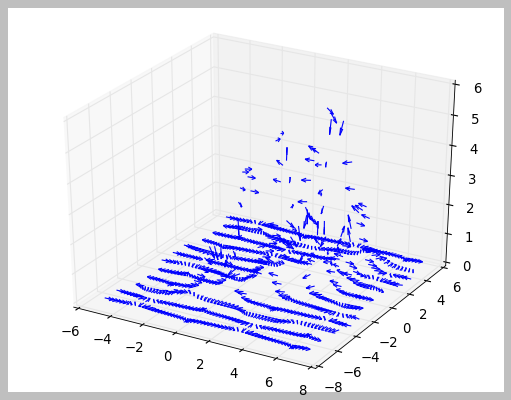

In [43]:
fig = plt.figure()
ax = fig.gca(projection='3d')
d=5
x =  X[::d]
y =  Y[::d]/3
z =  Z[::d]/200
u = 5*np.sin(x) * np.cos(y) * np.cos(z)
v = - 2* np.cos( x) * np.sin( y) * np.cos(z)
w = np.cos(x) * np.cos(y) * np.sin(z)

ax.quiver(x, y, z, u, v, w, length=0.5, arrow_length_ratio=0.5);


Veamos un ejemplo de la documentación de **Matplotlib**

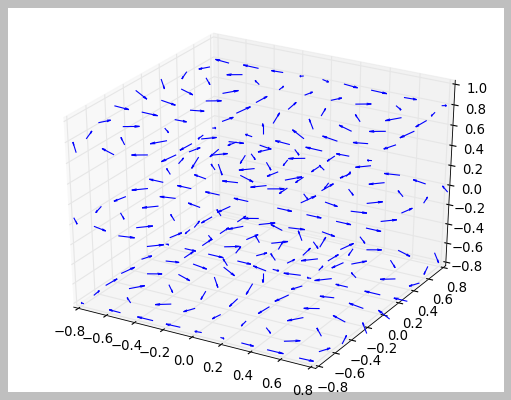

In [45]:

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1);

Más información sobre este tipo de gráficos en http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html